In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.express as px
#import datapane as dp



In [6]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
msft = yf.Ticker("ABNB")
df =  msft.history(period="MAX", interval="1d")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-10 00:00:00-05:00,146.000000,165.000000,141.250000,144.710007,70447500,0.0,0.0
2020-12-11 00:00:00-05:00,146.550003,151.500000,135.100006,139.250000,26980800,0.0,0.0
2020-12-14 00:00:00-05:00,135.000000,135.300003,125.160004,130.000000,16966100,0.0,0.0
2020-12-15 00:00:00-05:00,126.690002,127.599998,121.500000,124.800003,10914400,0.0,0.0
2020-12-16 00:00:00-05:00,125.830002,142.000000,124.910004,137.990005,20409600,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-10 00:00:00-05:00,114.525002,118.540001,114.169998,118.150002,4773500,0.0,0.0
2023-11-13 00:00:00-05:00,117.510002,119.860001,117.401001,119.150002,3408800,0.0,0.0
2023-11-14 00:00:00-05:00,122.355003,127.120003,121.510002,126.680000,8405200,0.0,0.0


Alparecer solo trae los datos desde 10 de dicembre del 2020

### La Columna "Date" lo lee como índice porque en Pandas, es común utilizar una columna de fecha y hora como índice cuando se trabaja con datos de series de tiempo. Esto es especialmente útil cuando se hace realizar análisis y operaciones relacionadas con fechas, ya que tener la fecha y hora como índice permite un acceso más eficiente a los datos en función de la fecha.
### por esta rezon no lo colocamos como colomna, para el EDA, pero si cuando lo subamos a la base de datos.

# Analisis Exploratorio De Los Datos
## ¿Qué tipo de dato son las variables del conjunto de datos?

In [3]:
df.dtypes


Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [4]:
(
    df
    .dtypes
    .value_counts()
)

float64    6
int64      1
dtype: int64

In [11]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [5]:
df.shape

(718, 7)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [6]:
(   df
    .isnull()
    .any()
    )

Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
dtype: bool

## Preludio: ¿Qué estadísticos describen el conjunto de datos?
### Todas las variables

In [7]:
df.describe(include='all')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,718.000000,718.000000,718.000000,718.000000,7.180000e+02,718.0,718.0
mean,139.939046,143.114316,136.831638,140.015773,6.632710e+06,0.0,0.0
std,29.769010,30.697037,28.780419,29.650640,5.476551e+06,0.0,0.0
min,82.970001,84.250000,81.910004,82.489998,1.995400e+06,0.0,0.0
25%,115.764000,118.907501,113.515001,116.134998,4.121400e+06,0.0,0.0
50%,140.070000,143.110001,136.769997,139.445000,5.290650e+06,0.0,0.0
75%,163.924999,168.246498,160.595005,164.720005,7.242825e+06,0.0,0.0
max,216.240005,219.940002,209.089996,216.839996,7.478640e+07,0.0,0.0


Alparecer la columnas Dividend  y Stock Splits es 0, esto puede deberse a que desde hace 716 dias no ha habido reparticion de dividendos ni han hecho Splits a las acciones, para que la gente compre mas.

## Confirmamos que toda la  columna tiene valor 0.0

In [8]:
contador_ceros = df['Stock Splits'].value_counts().get(0, 0)
print(contador_ceros)


718


## Confirmamos que no hayan numeros diferente de 0

In [9]:
# Seleccionar registros que no contengan 0.0 en 'mi_columna'
registros_sin_cero = df.loc[df['Stock Splits'] != 0.0]

registros_sin_cero

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,


In [10]:

# Seleccionar registros que no contengan 0.0 en 'mi_columna'
registros_sin_cero = df.loc[df['Dividends'] != 0.0]

registros_sin_cero

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,


Como ninguna de estas 2 columnas nos sirven para anailisis seran borradas posteriormente


## Corplot Para Analizar las Correlaciones entre Las variables


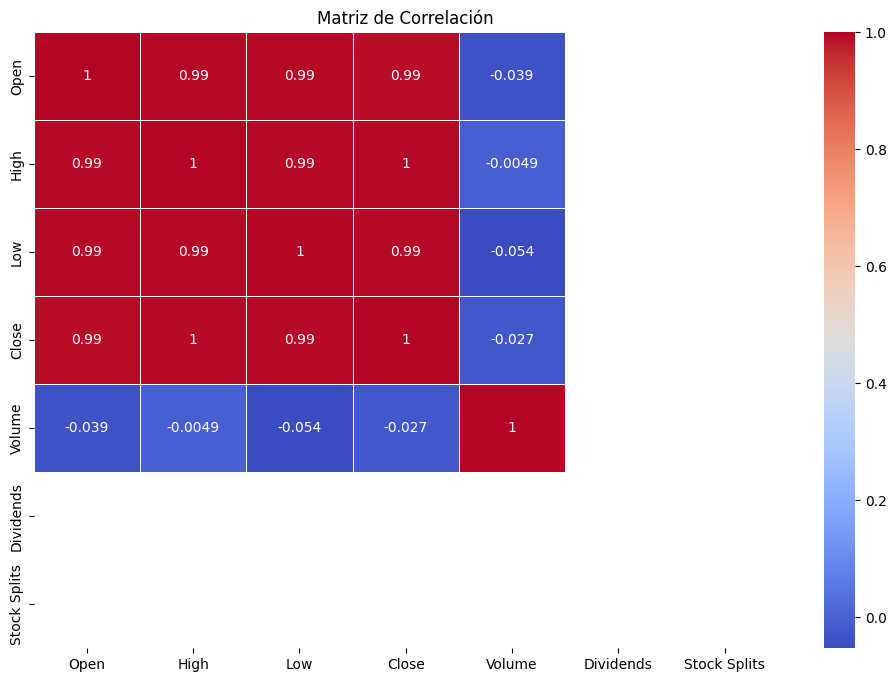

In [11]:
correlation_matrix = df.corr()

# Crea el gráfico de matriz de correlación (corrplot)
plt.figure(figsize=( 12,8))  # Ajusta el tamaño de la figura según tus preferencias
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Podemos observar que la unica todos las variables tienen correlacion entre si, exceptuando Volume

## Graficando el precio de cierre de Airbnb en Los Ultimos 720 dias 

In [12]:
airbnb_price_chart = px.line(df['Close'],
                             title='Airbnb Daily Close Price',
                             color_discrete_map={'Close':'green'},
                             width=800, height=800)
airbnb_price_chart.show()

Podemos observar una caida pronunciada en las acciones de airbnb, desde el 4 de abril , hasta  el 14 de julio.
al dia de hoy en los ultimos meses , podemos ver de que el mercado se ha recuperado, rompiendo la linea de soporte de los 120 puntos y ahora se encuentra  consolidado 

podemos confirmar que solo trae los datos desde 10 de dicembre del 2020

##  gráfico de área que muestra el volumen diario negociado de las acciones de Airbnb definiendo el área y la línea de Volumen en morado.

In [13]:
df_volume_chart = px.area(df['Volume'],
                          title='Tesla Daily Volume',
                          color_discrete_map={'Volume':'purple'} ,
                          width=800, height=400)
df_volume_chart.show()

In [3]:
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-12-10 00:00:00-05:00,146.000000,165.000000,141.250000,144.710007,70447500,0.0,0.0
1,2020-12-11 00:00:00-05:00,146.550003,151.500000,135.100006,139.250000,26980800,0.0,0.0
2,2020-12-14 00:00:00-05:00,135.000000,135.300003,125.160004,130.000000,16966100,0.0,0.0
3,2020-12-15 00:00:00-05:00,126.690002,127.599998,121.500000,124.800003,10914400,0.0,0.0
4,2020-12-16 00:00:00-05:00,125.830002,142.000000,124.910004,137.990005,20409600,0.0,0.0
...,...,...,...,...,...,...,...,...
734,2023-11-10 00:00:00-05:00,114.525002,118.540001,114.169998,118.150002,4773500,0.0,0.0
735,2023-11-13 00:00:00-05:00,117.510002,119.860001,117.401001,119.150002,3408800,0.0,0.0
736,2023-11-14 00:00:00-05:00,122.355003,127.120003,121.510002,126.680000,8405200,0.0,0.0
737,2023-11-15 00:00:00-05:00,128.000000,131.619995,127.060997,128.350006,6851400,0.0,0.0


In [4]:
 # Cambiar los nombres de las columnas a minúsculas
df = df.rename(columns=lambda x: x.lower())
df


,date,open,high,low,close,volume,dividends,stock splits
0,2020-12-10 00:00:00-05:00,146.000000,165.000000,141.250000,144.710007,70447500,0.0,0.0
1,2020-12-11 00:00:00-05:00,146.550003,151.500000,135.100006,139.250000,26980800,0.0,0.0
2,2020-12-14 00:00:00-05:00,135.000000,135.300003,125.160004,130.000000,16966100,0.0,0.0
3,2020-12-15 00:00:00-05:00,126.690002,127.599998,121.500000,124.800003,10914400,0.0,0.0
4,2020-12-16 00:00:00-05:00,125.830002,142.000000,124.910004,137.990005,20409600,0.0,0.0
...,...,...,...,...,...,...,...,...
734,2023-11-10 00:00:00-05:00,114.525002,118.540001,114.169998,118.150002,4773500,0.0,0.0
735,2023-11-13 00:00:00-05:00,117.510002,119.860001,117.401001,119.150002,3408800,0.0,0.0
736,2023-11-14 00:00:00-05:00,122.355003,127.120003,121.510002,126.680000,8405200,0.0,0.0
737,2023-11-15 00:00:00-05:00,128.000000,131.619995,127.060997,128.350006,6851400,0.0,0.0


In [13]:
    # Suponiendo que 'Date' es la columna en df que tiene las fechas en formato '2020-12-10 00:00:00-05:00'
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime("%Y-%m-%d")
df

,date,open,high,low,close,volume,dividends,stock splits
0,2020-12-10,146.000000,165.000000,141.250000,144.710007,70447500,0.0,0.0
1,2020-12-11,146.550003,151.500000,135.100006,139.250000,26980800,0.0,0.0
2,2020-12-14,135.000000,135.300003,125.160004,130.000000,16966100,0.0,0.0
3,2020-12-15,126.690002,127.599998,121.500000,124.800003,10914400,0.0,0.0
4,2020-12-16,125.830002,142.000000,124.910004,137.990005,20409600,0.0,0.0
...,...,...,...,...,...,...,...,...
734,2023-11-10,114.525002,118.540001,114.169998,118.150002,4773500,0.0,0.0
735,2023-11-13,117.510002,119.860001,117.401001,119.150002,3408800,0.0,0.0
736,2023-11-14,122.355003,127.120003,121.510002,126.680000,8405200,0.0,0.0
737,2023-11-15,128.000000,131.619995,127.060997,128.350006,6851400,0.0,0.0


In [15]:
df.dtypes


date             object
open            float64
high            float64
low             float64
close           float64
volume            int64
dividends       float64
stock splits    float64
dtype: object

podemos observar que el volumen de dinero que se mueve en esta accion es muy similar, a excepcion de ciertos picos.